## **<h3 align="center">Series/ Tv Show - MetaData</h3>**
**Group members:**<br>
Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Ilona Nacu - 20211602@novaims.unl.pt - 20211602<br>
Francisco Farinha - 20211550@novaims.unl.pt - 20211550<br>
João Barradas - 20211590@novaims.unl.pt - 20211590<br>
Rafael Proença  - 2021681@novaims.unl.pt - 2021681<br>

## Introduction
This notebook will serve to the chat to have a database about the tv shows, in particular to have access to CritiScore of a movie available in the dataset, for simplicity we will call the database Metadata. To create the metadata, we will perform some preprocessing techniques. 

## Table of Contents
* [1. Import the Libraries](#chapter1)
* [2. Import the Dataset](#chapter2)
* [3. Preprocessing](#chapter3)
    * [3.1. Series Dataset](#section_3_1)
    * [3.2. Series_data Dataset](#section_3_2)
    * [3.3. Archice_data Dataset](#section_3_3)
* [4. Merging the Datasets](#chapter4)
    * [4.1. Cleaning the Merged Dataset](#section_4_1)
    * [4.2. Genres](#section_4_2)
    * [4.3. CritiScore](#section_4_3)
    * [4.4. Saving the Metadata with CritiScores](#section_4_4)


-----------------------------
# 1. Import the Libraries <a class="anchor" id="chapter1"></a>
To run the following notebook, we need to firstly, add the imports.

In [48]:
# General imports
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Data analysis and manipulation
import pandas as pd


------------------------------------------
# 2. Import the Dataset <a class="anchor" id="chapter2"></a>
Now it is time to open the csv files. Inside the archive we have different datasets divided by genre. Since our goal is to have a more complete dataset we will join this datasets. All the datasets were provided by Kaggle:
- series_data - https://www.kaggle.com/datasets/harshitshankhdhar/tv-series-dataset (Retrieved at 20 november)
- TV series - https://www.kaggle.com/datasets/muralidharbhusal/50000-imdb-tv-and-web-series (Retrieved at 20 november)
- archive data - https://www.kaggle.com/datasets/suraj520/imdb-tv-series-data/data (Retrieved at 20 november)

In [2]:
# Path to the directory containing CSV files
directory_path = 'Data\\Tv_show_files'

try:
    # Initialize an empty list to store the dataframes
    dfs = []

    # Read 'series_data.csv'
    series_data = pd.read_csv(os.path.join(directory_path, 'series_data.csv'), encoding='utf-8')
    
    # Read 'TV Series.csv'
    series = pd.read_csv(os.path.join(directory_path, 'TV Series.csv'), encoding='utf-8')
    
    # Iterate through CSV files in 'archive' directory
    for file in os.listdir(os.path.join(directory_path, 'archive')):
        if file.endswith('.csv'):
            file_path = os.path.join(directory_path, 'archive', file)
            # Read the CSV file into a dataframe
            df = pd.read_csv(file_path, encoding='utf-8')
            
            # Add a new column with a unique value for each file
            df['UniqueValue'] = os.path.splitext(file)[0]  # Extracts the file name without extension
            
            # Append the dataframe to the list
            dfs.append(df)

    # Concatenate all 'archive' dataframes into a single dataframe
    archive_data = pd.concat(dfs, ignore_index=True)

except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


C:\Users\xandg\AppData\Local\Temp\ipykernel_13016\631337160.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  archive_data = pd.concat(dfs, ignore_index=True)


In [3]:
print("Series Data:")
series_data.head(3)

Series Data:


,Poster_Link,Series_Title,Runtime_of_Series,Certificate,Runtime_of_Episodes,Genre,IMDB_Rating,Overview,Star1,Star2,Star3,Star4,No_of_Votes
0,https://m.media-amazon.com/images/M/MV5BYTRiND...,Game of Thrones,(2011–2019),A,57 min,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,Emilia Clarke,Peter Dinklage,Kit Harington,Lena Headey,1773458
1,https://m.media-amazon.com/images/M/MV5BMjhiMz...,Breaking Bad,(2008–2013),18,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,Bryan Cranston,Aaron Paul,Anna Gunn,Betsy Brandt,1468887
2,https://m.media-amazon.com/images/M/MV5BMTc5Zm...,The Walking Dead,(2010– ),18+,44 min,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,Andrew Lincoln,Norman Reedus,Melissa McBride,Danai Gurira,854698


In [4]:
print("\nSeries:")
series.head(3)


Series:


,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
0,Wednesday,(2022– ),45 min,"Comedy, Crime, Fantasy",8.2,"Jenna Ortega, Hunter Doohan, Percy Hynes White...","Follows Wednesday Addams' years as a student, ..."
1,Yellowstone,(2018– ),60 min,"Drama, Western",8.7,"Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...",A ranching family in Montana faces off against...
2,The White Lotus,(2021–2023),60 min,"Comedy, Drama",7.9,"Jennifer Coolidge, Jon Gries, F. Murray Abraha...","Set in a tropical resort, it follows the explo..."


In [5]:
print("\nArchive Data:")
archive_data.head(3)


Archive Data:


,Title,IMDb ID,Release Year,Genre,Cast,Synopsis,Rating,Runtime,Certificate,Number of Votes,Gross Revenue,UniqueValue
0,Spider-Man: Across the Spider-Verse,tt9362722,2023,"Animation, Action, Adventure","Directors:, Joaquim Dos Santos, , Kemp Powers,...","Miles Morales catapults across the Multiverse,...",9.1,140 min,PG,71960,NaN,action_series
1,FUBAR,tt13064902,2023–,"Action, Adventure, Thriller","Stars:, Arnold Schwarzenegger, , Monica Barbar...",A C.I.A. operative on the edge of retirement d...,6.5,NaN,TV-MA,15422,NaN,action_series
2,Barry,tt5348176,2018–2023,"Action, Comedy, Crime","Stars:, Bill Hader, , Stephen Root, , Sarah Go...",A hit man from the Midwest moves to Los Angele...,8.4,30 min,TV-MA,101883,NaN,action_series


There are some features that have different names but they are similar, for that, before merging all the datasets we need to:
- treat the NaN values;
- duplicate rows;
- delete link and other irrelevant variables;
- change the variables names.


-------------------------------------
# 3. Preprocessing <a class="anchor" id="chapter3"></a>
Let's start with the preprocess of each dataset. This is done individualy to be easier then to merge all the information about each book.

## 3.1. Series Dataset <a class="anchor" id="section_3_1"></a>
Using the info() method we are able to check missing values and also the datatypes. 

In [6]:
series.head(3)

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
0,Wednesday,(2022– ),45 min,"Comedy, Crime, Fantasy",8.2,"Jenna Ortega, Hunter Doohan, Percy Hynes White...","Follows Wednesday Addams' years as a student, ..."
1,Yellowstone,(2018– ),60 min,"Drama, Western",8.7,"Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...",A ranching family in Montana faces off against...
2,The White Lotus,(2021–2023),60 min,"Comedy, Drama",7.9,"Jennifer Coolidge, Jon Gries, F. Murray Abraha...","Set in a tropical resort, it follows the explo..."


In [7]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Series Title  50000 non-null  object
 1   Release Year  49800 non-null  object
 2   Runtime       50000 non-null  object
 3   Genre         50000 non-null  object
 4   Rating        50000 non-null  object
 5   Cast          49909 non-null  object
 6   Synopsis      50000 non-null  object
dtypes: object(7)
memory usage: 2.7+ MB


We have some missing values. Since we have a lot of data we will delete all those rows that have null values.

In [8]:
series.dropna(inplace=True)

In [10]:
series['Series Title'].describe()

count          49744
unique          9406
top       The Office
freq             804
Name: Series Title, dtype: object

Also it is important that the same features has same name. So we will rename the following features.

In [11]:
series.rename(columns={'Series Title': 'Series_title', 
                       'Release Year': 'Release_year'}, inplace=True)

Now we can advance to the next preprocessing.
## 3.2. Series_data Dataset <a class="anchor" id="section_3_2"></a>
Let's start visualizing the dataset.

In [12]:
series_data.head(3)

,Poster_Link,Series_Title,Runtime_of_Series,Certificate,Runtime_of_Episodes,Genre,IMDB_Rating,Overview,Star1,Star2,Star3,Star4,No_of_Votes
0,https://m.media-amazon.com/images/M/MV5BYTRiND...,Game of Thrones,(2011–2019),A,57 min,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,Emilia Clarke,Peter Dinklage,Kit Harington,Lena Headey,1773458
1,https://m.media-amazon.com/images/M/MV5BMjhiMz...,Breaking Bad,(2008–2013),18,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,Bryan Cranston,Aaron Paul,Anna Gunn,Betsy Brandt,1468887
2,https://m.media-amazon.com/images/M/MV5BMTc5Zm...,The Walking Dead,(2010– ),18+,44 min,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,Andrew Lincoln,Norman Reedus,Melissa McBride,Danai Gurira,854698


In [13]:
series_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Poster_Link          2000 non-null   object 
 1   Series_Title         2000 non-null   object 
 2   Runtime_of_Series    2000 non-null   object 
 3   Certificate          703 non-null    object 
 4   Runtime_of_Episodes  1957 non-null   object 
 5   Genre                2000 non-null   object 
 6   IMDB_Rating          2000 non-null   float64
 7   Overview             2000 non-null   object 
 8   Star1                2000 non-null   object 
 9   Star2                2000 non-null   object 
 10  Star3                1999 non-null   object 
 11  Star4                1995 non-null   object 
 12  No_of_Votes          2000 non-null   int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 203.3+ KB


As we can see by using head() and info() we can eliminate Certificate and Poster_link. <br>
We can also create a feature, already in the previous dataset named "Cast" by merging Star1, Star2, Star3 and Star4. <br>
Also, we can change the name of Series_Title to "Series_title", Runtime_of_series to "Release_year", and Overview to "Synopsis" <br>
And finally, drop missing values.

In [14]:
series_data.drop(columns=['Certificate', 'Poster_Link','No_of_Votes_IMDB'], inplace=True, errors='ignore')

In [15]:
series_data['Cast'] = series_data[['Star1', 'Star2', 'Star3', 'Star4']].fillna('').agg(', '.join, axis=1)
# Drop individual star columns
series_data.drop(['Star1', 'Star2', 'Star3', 'Star4'], axis=1, inplace=True)

In [16]:
# Rename columns
series_data.rename(columns={'Series_Title': 'Series_title', 'Runtime_of_Series': 'Release_year', 'Overview': 'Synopsis', 'Runtime_of_Episodes': "Runtime", 'No_of_Votes':'No_of_Votes_IMDB'}, inplace=True)

In [17]:
series_data.dropna(inplace=True)

In [18]:
series_data.head(3)

,Series_title,Release_year,Runtime,Genre,IMDB_Rating,Synopsis,No_of_Votes_IMDB,Cast
0,Game of Thrones,(2011–2019),57 min,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,1773458,"Emilia Clarke, Peter Dinklage, Kit Harington, ..."
1,Breaking Bad,(2008–2013),49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,1468887,"Bryan Cranston, Aaron Paul, Anna Gunn, Betsy B..."
2,The Walking Dead,(2010– ),44 min,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,854698,"Andrew Lincoln, Norman Reedus, Melissa McBride..."



Now we can advance to the next preprocessing.
## 3.3. Archice_data  Dataset <a class="anchor" id="section_3_3"></a>
Let's start with the preprocessing of this dataset.

In [19]:
archive_data.head(3)

,Title,IMDb ID,Release Year,Genre,Cast,Synopsis,Rating,Runtime,Certificate,Number of Votes,Gross Revenue,UniqueValue
0,Spider-Man: Across the Spider-Verse,tt9362722,2023,"Animation, Action, Adventure","Directors:, Joaquim Dos Santos, , Kemp Powers,...","Miles Morales catapults across the Multiverse,...",9.1,140 min,PG,71960,NaN,action_series
1,FUBAR,tt13064902,2023–,"Action, Adventure, Thriller","Stars:, Arnold Schwarzenegger, , Monica Barbar...",A C.I.A. operative on the edge of retirement d...,6.5,NaN,TV-MA,15422,NaN,action_series
2,Barry,tt5348176,2018–2023,"Action, Comedy, Crime","Stars:, Bill Hader, , Stephen Root, , Sarah Go...",A hit man from the Midwest moves to Los Angele...,8.4,30 min,TV-MA,101883,NaN,action_series


As we can see inside Cast we have directors and stars. For this we will create a separate feature for Directors and another for Stars(that will be the actual Cast column)

In [20]:
archive_data["Cast"]

0         Directors:, Joaquim Dos Santos, , Kemp Powers,...
1         Stars:, Arnold Schwarzenegger, , Monica Barbar...
2         Stars:, Bill Hader, , Stephen Root, , Sarah Go...
3         Director:, Chad Stahelski, | ,     Stars:, Kea...
4         Director:, Louis Leterrier, | ,     Stars:, Vi...
                                ...                        
236823    Director:, Daniel Goldhaber, | ,     Stars:, A...
236824    Stars:, Anson Mount, , Colm Meaney, , Robin Mc...
236825    Director:, John Sturges, | ,     Stars:, Yul B...
236826    Stars:, Frank McGrath, , Terry Wilson, , Rober...
236827    Director:, Robert Rodriguez, | ,     Stars:, A...
Name: Cast, Length: 236828, dtype: object

In [21]:
# Extracting 'Directors' and 'Stars' information separately
archive_data['Directors'] = archive_data['Cast'].str.extract(r'Director[s]*:([^|]*)', expand=False).str.strip()
archive_data['Stars'] = archive_data['Cast'].str.extract(r'Stars:([^|]*)', expand=False).str.strip()

# Drop the original 'Cast' column if needed
archive_data.drop(columns=['Cast'], inplace=True)

Using head() we can eliminate Certificate, Gross Revenue (since this isn't a features common in the other datasets) and UniqueValue. <br>
Also, we can change the name of Title to "Series_title" and Release Year to "Release_year", Number of Votes to "No_of_Votes"and  Stars to "Cast.

In [24]:
# Remove 'Certificate', 'Gross Revenue', and 'UniqueValue' columns
archive_data.drop(columns=['Certificate', 'Gross Revenue', 'UniqueValue','IMDb ID','Number of Votes'], inplace=True, errors='ignore')

In [25]:
# Rename columns
archive_data.rename(columns={
    'Title': 'Series_title',
    'Release Year': 'Release_year',
    'Stars': 'Cast'
}, inplace=True)

In [26]:
archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236828 entries, 0 to 236827
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Series_title  236828 non-null  object 
 1   Release_year  236819 non-null  object 
 2   Genre         236828 non-null  object 
 3   Synopsis      236828 non-null  object 
 4   Rating        236828 non-null  float64
 5   Runtime       216983 non-null  object 
 6   Directors     165866 non-null  object 
 7   Cast          229850 non-null  object 
dtypes: float64(1), object(7)
memory usage: 14.5+ MB


In [27]:
archive_data.dropna(inplace=True)

In [28]:
archive_data['Series_title'].nunique()

70833

---------------------------------------
# 4. Merging the Datasets <a class="anchor" id="chapter4"></a>
Now that we did the separated the preprocessing, we will merge by Series_title.

In [30]:
final_shows = pd.concat([archive_data, series, series_data])
merged_data_tvshows = final_shows.groupby('Series_title').agg(lambda x: x.dropna().unique().tolist()).reset_index()

In [31]:
merged_data_tvshows.head(3)

,Series_title,Release_year,Genre,Synopsis,Rating,Runtime,Directors,Cast,IMDB_Rating,No_of_Votes_IMDB
0,Cheyenne,[1955–1963],[Western],[After a close friend of Cheyenne is killed du...,"[7.6, 7.8]","[40 min, 60 min]","[, Richard L. Bare,]","[, Clint Walker, , Adele Mara, , L.Q. Jones, ,...",[],[]
1,HBO Storybook Musicals,[1987– ],"[Animation, Family, Musical]",[Mike and his trusty shovel Mary Anne are know...,[7.7],[26 min],"[, Michael Sporn,]","[, Robert Klein, , Jason Biggs, , Tina Fabriqu...",[],[]
2,Jurassic World: Camp Cretaceous,[2020–2022],"[Animation, Action, Adventure]","[Based on the show Camp Cretaceous, Hidden Adv...",[7.1],[32 min],"[, Leah Artwick, , Eric Elrod, , Michael Mulle...","[, Paul-Mikél Williams, , Sean Giambrone, , Ka...",[],[]


In [32]:
merged_data_tvshows.columns

Index(['Series_title', 'Release_year', 'Genre', 'Synopsis', 'Rating',
       'Runtime', 'Directors', 'Cast', 'IMDB_Rating', 'No_of_Votes_IMDB'],
      dtype='object')

Using the head() we have some main things to solve in this dataset:
- setting empty columns to zero;
- take out the brackets;
- analyse the existing categories;
- create CritiScore.

## 4.1. Cleaning the Merged Dataset <a class="anchor" id="section_4_1"></a>
In this subsection we wil do some cleaning steps, as setting empty columns to zero, remove brackets, cleaning text, changing variable names, and other relevant steps. <br>
There are still some things that we can do for your dataset:
1. Set empty lists to zero: To replace empty lists with zeros in the DataFrame, we can use the apply function to identify and replace the empty lists in specific columns.

2. Extract numbers from 'Runtime': We'll extract the numerical values from the 'Runtime' column by removing the 'min' text.

3. Convert columns containing lists into numbers: We'll convert the columns 'Rating', 'No_of_Votes_Rating', 'IMDB_Rating', 'No_of_Votes_IMDB' from lists to individual numerical values.

In [33]:
# Loop through all columns and replace empty lists with zeros
for col in merged_data_tvshows.columns:
    merged_data_tvshows[col] = merged_data_tvshows[col].apply(lambda x: 0 if isinstance(x, list) and len(x) == 0 else x)

def join_elements(x):
    if isinstance(x, list):
        return ', '.join(str(i) if not isinstance(i, float) else str(int(i)) for i in x)
    return x

# Remove brackets from all columns in the DataFrame
merged_data_tvshows = merged_data_tvshows.applymap(join_elements)

C:\Users\xandg\AppData\Local\Temp\ipykernel_13016\3625816130.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_data_tvshows = merged_data_tvshows.applymap(join_elements)


Deleting those rows that have more than one value.

In [34]:
# Identify rows where original_release_year or streaming_release_year contain commas
multiple_years_indices = merged_data_tvshows.apply(lambda x: (',' in str(x['Rating'])) or (',' in str(x['IMDB_Rating'])), axis=1)

# Filter out rows with multiple values in either column
merged_data_tvshows = merged_data_tvshows[~multiple_years_indices]

# Check the shape of the DataFrame after filtering
print("Shape of DataFrame after removing rows:", merged_data_tvshows.shape)


Shape of DataFrame after removing rows: (73952, 10)


Using some regex patterns learn in Text Mining classes we will clean the text. We will also change some datatypes.

In [36]:
# Convert 'Directors' and 'Cast' columns to string type
merged_data_tvshows['Directors'] = merged_data_tvshows['Directors'].astype(str)
merged_data_tvshows['Cast'] = merged_data_tvshows['Cast'].astype(str)

# Define a function to clean the strings in the columns
def clean_strings(text):
    # Remove leading and trailing spaces
    text = text.strip()
    # Replace multiple spaces with a single space
    text = ' '.join(text.split())
    # Remove leading comma
    if text.startswith(','):
        text = text[1:]
    # Remove trailing comma
    if text.endswith(','):
        text = text[:-1]
    # Replace two consecutive commas with one comma
    text = text.replace(', ,', ',')
    return text

# Clean 'Directors' column
merged_data_tvshows['Directors'] = merged_data_tvshows['Directors'].apply(clean_strings)

# Clean 'Cast' column
merged_data_tvshows['Cast'] = merged_data_tvshows['Cast'].apply(clean_strings)

In [38]:
# Convert 'Runtime' to string type to handle non-string values
merged_data_tvshows['Runtime'] = merged_data_tvshows['Runtime'].astype(str)
# Extract numerical values with regular expression and handle missing or non-matching values
merged_data_tvshows['Runtime'] = merged_data_tvshows['Runtime'].str.extract(r'(\d+)', expand=False)
merged_data_tvshows['Runtime'] = merged_data_tvshows['Runtime'].replace('', np.nan)  # Replace empty strings with NaN
# Identify rows where original_release_year or streaming_release_year contain commas
multiple_years_indices = merged_data_tvshows.apply(lambda x: (',' in str(x['Runtime'])), axis=1)

# Filter out rows with multiple values in either column
merged_data_tvshows = merged_data_tvshows[~multiple_years_indices]

merged_data_tvshows['Runtime'] = pd.to_numeric(merged_data_tvshows['Runtime'],errors='coerce')
merged_data_tvshows['Runtime'].fillna(0, inplace=True)
merged_data_tvshows['Runtime'] = merged_data_tvshows['Runtime'].astype(int)  # Convert to int type
# Convert the 'Rating' column to numeric, converting any non-convertible values to NaN
merged_data_tvshows['Rating'] = pd.to_numeric(merged_data_tvshows['Rating'], errors='coerce')

# Fill NaN values with zeros
merged_data_tvshows['Rating'].fillna(0, inplace=True)

# Round the 'stars_rating' column to the nearest whole number and cast to integer
merged_data_tvshows['Rating'] = np.round(merged_data_tvshows['Rating']).astype(int)
merged_data_tvshows['IMDB_Rating'] = merged_data_tvshows['IMDB_Rating'].astype(int)

In [39]:
# Convert columns containing lists into numbers
cols_to_convert_to_number = ['Rating', 'IMDB_Rating']

for col in cols_to_convert_to_number:
    merged_data_tvshows[col] = merged_data_tvshows[col].apply(lambda x: x[0] if isinstance(x, list) and len(x) == 1 else x)

We also saw that we same some untitled movies, let's check their relevance.

In [40]:
game_titles = merged_data_tvshows[merged_data_tvshows['Series_title'].str.contains('untitled', case=False)]
print(len(game_titles))

5


Since they are only 5 rows, we decided to delete.

In [41]:
merged_data_tvshows = merged_data_tvshows[~merged_data_tvshows['Series_title'].str.contains('untitled', case=False)]

# Display updated DataFrame after removing rows with 'untitled' in the 'Title' column
merged_data_tvshows.head(3)

,Series_title,Release_year,Genre,Synopsis,Rating,Runtime,Directors,Cast,IMDB_Rating,No_of_Votes_IMDB
1,HBO Storybook Musicals,1987–,"Animation, Family, Musical",Mike and his trusty shovel Mary Anne are known...,7,26,Michael Sporn,"Robert Klein, Jason Biggs, Tina Fabrique, She...",0,0
2,Jurassic World: Camp Cretaceous,2020–2022,"Animation, Action, Adventure","Based on the show Camp Cretaceous, Hidden Adve...",7,32,"Leah Artwick, Eric Elrod, Michael Mullen, Zes...","Paul-Mikél Williams, Sean Giambrone, Kausar M...",0,0
3,SMG4,2011–,"Animation, Action, Adventure",SMG4 goes insane and it's up to his friends to...,7,39,Luke Lerdwichagul,"James Bailey, Kevin Lerdwichagul, Luke Lerdwi...",0,0


Now it is time to delete the NaN values.

In [43]:
merged_data_tvshows.dropna(inplace=True)
merged_data_tvshows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73947 entries, 1 to 78983
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Series_title      73947 non-null  object
 1   Release_year      73947 non-null  object
 2   Genre             73947 non-null  object
 3   Synopsis          73947 non-null  object
 4   Rating            73947 non-null  int64 
 5   Runtime           73947 non-null  int32 
 6   Directors         73947 non-null  object
 7   Cast              73947 non-null  object
 8   IMDB_Rating       73947 non-null  int64 
 9   No_of_Votes_IMDB  73947 non-null  object
dtypes: int32(1), int64(2), object(7)
memory usage: 5.9+ MB


## 4.2. Genres <a class="anchor" id="section_4_2"></a>
In this subsection we will check the genres distribution. But before plotting the genres, we will to make sure that all of the genres are equally written, in our case, we will set all of the genres to lowercase.

In [44]:
# Convert genres column to lowercase
merged_data_tvshows['Genre'] = merged_data_tvshows['Genre'].str.lower()

# Display the modified 'genres' column
merged_data_tvshows['Genre']

1          animation, family, musical
2        animation, action, adventure
3        animation, action, adventure
4                              comedy
5                             romance
                     ...             
78979                 comedy, musical
78980                horror, thriller
78981                           drama
78982            action, crime, drama
78983       animation, comedy, family
Name: Genre, Length: 73947, dtype: object

In [45]:
# Combine all genres into a single string and split them
all_genres = ','.join(merged_data_tvshows['Genre'].explode().dropna())
split_genres = [genre.strip() for genre in all_genres.split(',')]

# Get the frequency of each individual genre
genre_counts = pd.Series(split_genres).value_counts()

# Calculate the percentage of each genre
genre_percentages = (genre_counts / genre_counts.sum()) * 100

# Sort genres by count in descending order
sorted_genres = genre_percentages.sort_values(ascending=False)

# Print percentages for each genre
for genre, percentage in sorted_genres.items():
    print(f"{genre}: {percentage:.2f}%")

drama: 18.09%
comedy: 11.24%
action: 6.36%
romance: 5.23%
adventure: 5.09%
documentary: 4.95%
crime: 4.73%
horror: 4.09%
music: 3.87%
thriller: 3.60%
biography: 3.57%
animation: 3.28%
family: 3.08%
history: 2.86%
mystery: 2.82%
musical: 2.74%
western: 2.61%
fantasy: 2.41%
short: 2.35%
war: 2.35%
sci-fi: 2.06%
sport: 1.79%
reality-tv: 0.38%
film-noir: 0.17%
game-show: 0.11%
news: 0.09%
talk-show: 0.08%
****: 0.01%
adult: 0.00%


By the output above there are some changes that migth be solved.

In [46]:
# Define the genre mapping dictionary
genre_mapping = {
    'sci-fi': 'science fiction',
    '****': 'adult'
}

# Iterate through the genre_mapping dictionary and apply replacements
for old_genres, new_genres in genre_mapping.items():
    merged_data_tvshows['Genre'] = merged_data_tvshows['Genre'].str.replace(old_genres, new_genres)

C:\Users\xandg\AppData\Local\Temp\ipykernel_13016\2284402086.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(sorted_genres))


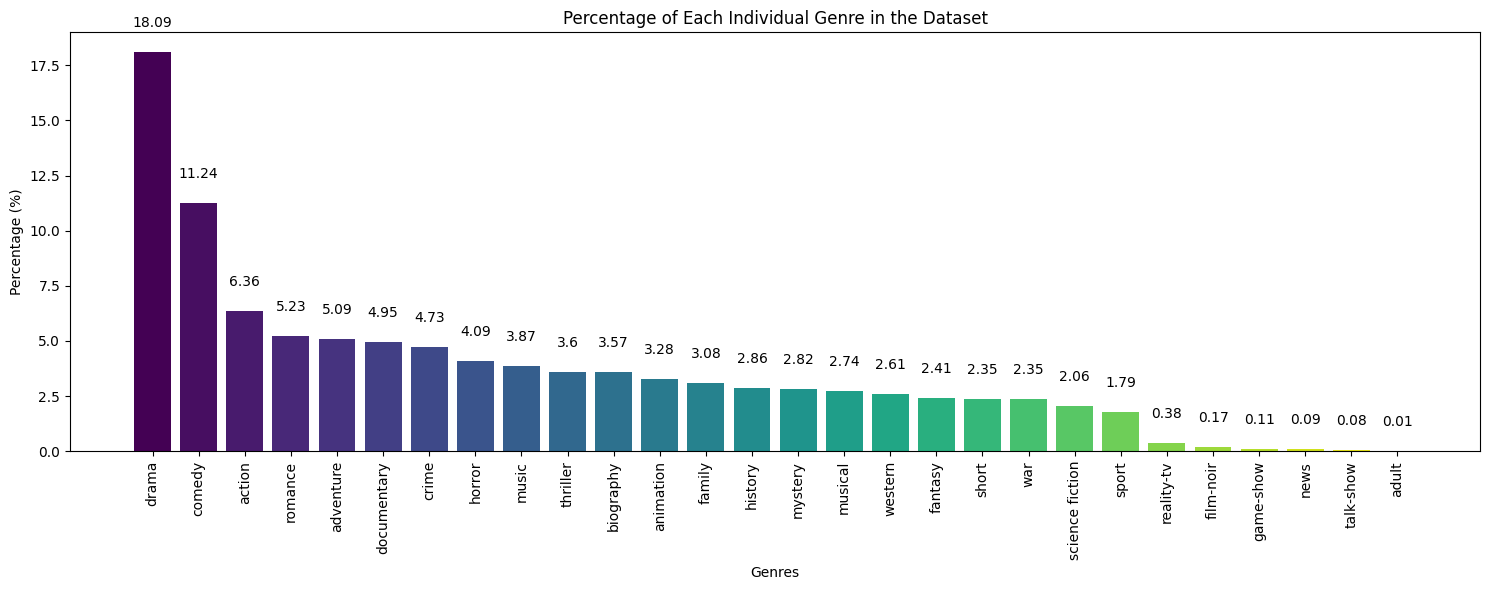

In [49]:
# Combine all genres into a single string and split them
all_genres = ','.join(merged_data_tvshows['Genre'].explode().dropna())
split_genres = [genre.strip() for genre in all_genres.split(',')]

# Get the frequency of each individual genre
genre_counts = pd.Series(split_genres).value_counts()

# Calculate the percentage of each genre
genre_percentages = (genre_counts / genre_counts.sum()) * 100

# Sort genres by count in descending order
sorted_genres = genre_percentages.sort_values(ascending=False)

# Customizing color
colors = plt.cm.get_cmap('viridis', len(sorted_genres))  

plt.figure(figsize=(15, 6))
bars = plt.bar(sorted_genres.index, sorted_genres, color=colors(range(len(sorted_genres))))
plt.title('Percentage of Each Individual Genre in the Dataset')
plt.xlabel('Genres')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 4.3. CritiScore <a class="anchor" id="section_4_3"></a>

The `CritiScore` for TV shows is a calculated metric derived from available ratings. It represents an aggregate score that combines the IMDb rating and another rating metric. To fit within the 0 to 100 scale, both IMDb Rating and the other metric are scaled by multiplying by 10. This results in a final score on a scale of 0 to 100.

The calculation process includes the following steps:

1. **IMDB_Rating**: Scaled to a range of 0-100 by multiplying by 10.
2. **Rating**: Scaled to a range of 0-100 by multiplying by 10 (specific to the dataset).
3. **CritiScore**: This metric is a weighted aggregate score derived from available ratings. It represents a weighted average of the scaled ratings.

| Metric             | Scale  | Description                                        |
|--------------------|--------|----------------------------------------------------|
| IMDB_Rating        | 0-10   | IMDb rating on a scale of 0 to 10, scaled by 10     |
| Rating             | 0-10   | Another rating metric (specific to the dataset), scaled by 10   |
| **CritiScore**     | 0-100  | Weighted aggregate score derived from ratings       |


Checking the distribution of ratings columns.

In [51]:
ratings = ['IMDB_Rating', 'Rating']
rating_stats = merged_data_tvshows[ratings].describe()
rating_stats.loc[['min', 'max']]

,IMDB_Rating,Rating
min,0.0,0.0
max,9.0,10.0


Rescaling:

In [56]:
# Scaling IMDb rating to a range of 0-100
merged_data_tvshows['IMDB_Rating_scaled'] = merged_data_tvshows['IMDB_Rating'] * 10

# Scaling stars rating to a range of 0-100
merged_data_tvshows['Rating_scaled'] = merged_data_tvshows['Rating'] * 10

Calculating the actually CritiScore.

In [57]:
def calculate_criti_score(row):
    ratings = ['IMDB_Rating_scaled','Rating_scaled']
    available_ratings = [row[rating] for rating in ratings if row[rating] > 0]  # Check for non-zero ratings
    
    if len(available_ratings) == 0:
        return None  # No available ratings

    elif len(available_ratings) == 1:
        return available_ratings[0]  # Only one available rating, return it as CritiScore

    else:
        # Calculate weighted average for available ratings
        weights = [1 / len(available_ratings)] * len(available_ratings)
        criti_score = sum(available_ratings[i] * weights[i] for i in range(len(available_ratings)))
        return criti_score  # Return weighted average of available ratings

# Apply the function to calculate CritiScore for each row
merged_data_tvshows['CritiScore'] = merged_data_tvshows.apply(calculate_criti_score, axis=1)
    
# Remove rows with no available ratings
merged_data_tvshows.dropna(subset=['CritiScore'], inplace=True)

# Round the 'CritiScore' to the nearest whole number and cast to integer
merged_data_tvshows['CritiScore'] = merged_data_tvshows['CritiScore'].round(0).astype(int)

For curiosity, let's create bins and check the distribution of CritiScore.

C:\Users\xandg\AppData\Local\Temp\ipykernel_13016\3755678665.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap('viridis', num_bins)  # Generating colormap


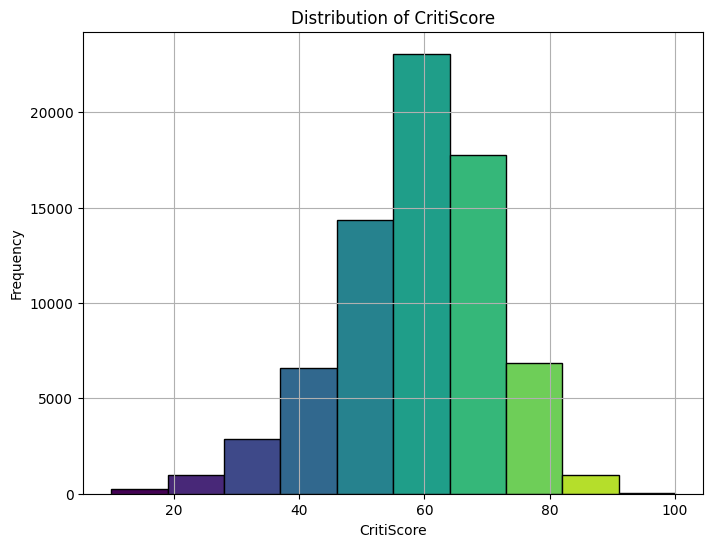

In [58]:
# Define the number of bins and create bins for the 'CritiScore' column
num_bins = 10  # Adjust the number of bins as needed
bins = pd.cut(merged_data_tvshows['CritiScore'], num_bins)

# Plot the histogram of CritiScore distribution with 'viridis' colormap
plt.figure(figsize=(8, 6))
colormap = get_cmap('viridis', num_bins)  # Generating colormap
plt.hist(merged_data_tvshows['CritiScore'], bins=num_bins, edgecolor='black')

# Set colors for each bar using the colormap
for i, patch in enumerate(plt.gca().patches):
    patch.set_facecolor(colormap(i))

plt.title('Distribution of CritiScore')
plt.xlabel('CritiScore')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## 4.4. Saving the Metadata with CritiScores <a class="anchor" id="section_4_4"></a>
Now we will delete unnecessary columns.

In [59]:
merged_data_tvshows.columns

Index(['Series_title', 'Release_year', 'Genre', 'Synopsis', 'Rating',
       'Runtime', 'Directors', 'Cast', 'IMDB_Rating', 'No_of_Votes_IMDB',
       'IMDB_Rating_scaled', 'Rating_scaled', 'CritiScore'],
      dtype='object')

In [60]:
# List of columns to delete
columns_to_delete = ['Rating_scaled', 'IMDB_Rating_scaled', 'IMDB_Rating', 'No_of_Votes_IMDB', 'Rating']

# Dropping the specified columns
merged_data_tvshows.drop(columns=columns_to_delete, inplace=True)

Now that we create the Data, we will save the dataset.

In [61]:
# Save as CSV
merged_data_tvshows.to_csv(r'Data/Metadata/tvshows.csv', index=False)